In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA

# Import our implementation
from model import OLS
from model import RidgeRegression
from model import PCAImplementation

# Load data
articles = pd.read_csv("phpgBMvy4.csv", header=0)
articles.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,'http://mashable.com/2013/01/07/amazon-instant...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,'http://mashable.com/2013/01/07/ap-samsung-spo...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,'http://mashable.com/2013/01/07/apple-40-billi...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,'http://mashable.com/2013/01/07/astronaut-notr...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,'http://mashable.com/2013/01/07/att-u-verse-ap...,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
# Select relevant variables
categorical_features = [
    "data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus",
    "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world",
    "weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday",
    "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday",
    "weekday_is_sunday", "is_weekend"
]

numerical_features = [
    "timedelta", "n_tokens_title", "n_tokens_content", "n_unique_tokens",
    "n_non_stop_words", "n_non_stop_unique_tokens", "num_hrefs", "num_self_hrefs",
    "num_imgs", "num_videos", "average_token_length", "num_keywords",
    "kw_min_min", "kw_max_min", "kw_avg_min", "kw_min_max", "kw_max_max",
    "kw_avg_max", "kw_min_avg", "kw_max_avg", "kw_avg_avg",
    "self_reference_min_shares", "self_reference_max_shares",
    "self_reference_avg_sharess", "LDA_00", "LDA_01", "LDA_02",
    "LDA_03", "LDA_04", "global_subjectivity", "global_sentiment_polarity",
    "global_rate_positive_words", "global_rate_negative_words", "rate_positive_words",
    "rate_negative_words", "avg_positive_polarity", "min_positive_polarity",
    "max_positive_polarity", "avg_negative_polarity", "min_negative_polarity",
    "max_negative_polarity", "title_subjectivity", "title_sentiment_polarity",
    "abs_title_subjectivity", "abs_title_sentiment_polarity", "shares"
]

In [3]:
# Print variable counts
total_variables = len(categorical_features) + len(numerical_features)
print(f"{len(categorical_features)} categorical variables, {len(numerical_features)} numerical variables, and {total_variables} variables in total.")

# Select data for regression analysis
selected_features = ["n_tokens_title", "n_tokens_content", "n_unique_tokens"]
target_variable = "shares"

X = articles[selected_features]
Y = articles[target_variable]


14 categorical variables, 46 numerical variables, and 60 variables in total.


### 1. OLS Implementation and comparison with scikit-learn implementation

In [4]:
# Fit OLS
ols = OLS().fit(X, Y)

# Compare with sklearn's LinearRegression
sklearn_ols = linear_model.LinearRegression(fit_intercept=True).fit(X, Y)
sklearn_ols_coefficients = [sklearn_ols.intercept_] + list(sklearn_ols.coef_)

In [5]:
# Fit OLS
ols = OLS().fit(X, Y)

# Compare with sklearn's LinearRegression
sklearn_ols = linear_model.LinearRegression(fit_intercept=True).fit(X, Y)
sklearn_ols_coefficients = [sklearn_ols.intercept_] + list(sklearn_ols.coef_)

# Create comparison DataFrame
comparison_ols = pd.DataFrame({
    "Variable": ["Intercept"] + selected_features,
    "Our Implementation": np.round(ols.coefficients, 3),
    "Sklearn": np.round(sklearn_ols_coefficients, 3)
})
print(comparison_ols)

# Export comparison to LaTeX
comparison_ols.to_latex(index=False)

           Variable  Our Implementation   Sklearn
0         Intercept            2862.544  2862.544
1    n_tokens_title              48.101    48.101
2  n_tokens_content               0.057     0.057
3   n_unique_tokens               2.853     2.853


'\\begin{tabular}{lrr}\n\\toprule\nVariable & Our Implementation & Sklearn \\\\\n\\midrule\nIntercept & 2862.544000 & 2862.544000 \\\\\nn_tokens_title & 48.101000 & 48.101000 \\\\\nn_tokens_content & 0.057000 & 0.057000 \\\\\nn_unique_tokens & 2.853000 & 2.853000 \\\\\n\\bottomrule\n\\end{tabular}\n'

### 2. Ridge Implementation and comparison with scikit-learn implementation

In [6]:
# Fit Ridge Regression
ridge = RidgeRegression().fit(X, Y)

# Create Ridge comparison DataFrame
comparison_ridge = pd.DataFrame({
    "Variable": ["Intercept"] + selected_features,
    "Our Implementation": np.round(ridge.coefficients, 3),
    "Sklearn": np.round(sklearn_ols_coefficients, 3)
})
print(comparison_ridge)

# Export Ridge comparison to LaTeX
comparison_ridge.to_latex(index=False)

           Variable  Our Implementation   Sklearn
0         Intercept            2860.643  2862.544
1    n_tokens_title              48.268    48.101
2  n_tokens_content               0.057     0.057
3   n_unique_tokens               2.856     2.853


'\\begin{tabular}{lrr}\n\\toprule\nVariable & Our Implementation & Sklearn \\\\\n\\midrule\nIntercept & 2860.643000 & 2862.544000 \\\\\nn_tokens_title & 48.268000 & 48.101000 \\\\\nn_tokens_content & 0.057000 & 0.057000 \\\\\nn_unique_tokens & 2.856000 & 2.853000 \\\\\n\\bottomrule\n\\end{tabular}\n'

### 3. Principal Component Analysis and comparison with scikit-learn implementation

Eigenvalues: [2.21942286e+05 1.23953003e+01 4.46748649e+00]


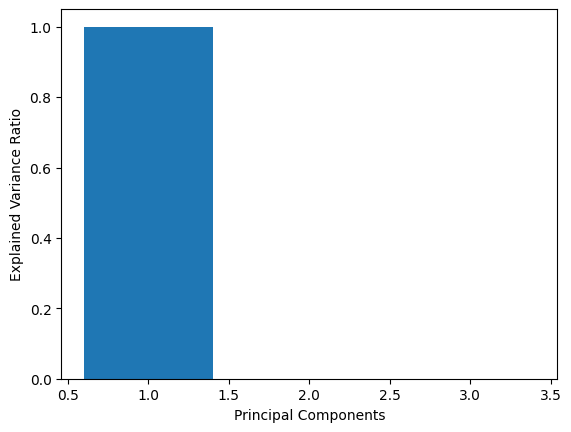

          Metric           Our Implementation                      Sklearn
0    Eigenvalues  [221942.286, 12.395, 4.467]  [221942.286, 12.395, 4.467]
1  Eigenvector 1             [0.0, 1.0, -0.0]             [0.0, 1.0, -0.0]
2  Eigenvector 2           [-0.005, 0.0, 1.0]           [-0.005, 0.0, 1.0]
3  Eigenvector 3           [1.0, -0.0, 0.005]           [1.0, -0.0, 0.005]


'\\begin{tabular}{lll}\n\\toprule\nMetric & Our Implementation & Sklearn \\\\\n\\midrule\nEigenvalues & [2.21942286e+05 1.23950000e+01 4.46700000e+00] & [2.21942286e+05 1.23950000e+01 4.46700000e+00] \\\\\nEigenvector 1 & [ 0.  1. -0.] & [ 0.  1. -0.] \\\\\nEigenvector 2 & [-0.005  0.     1.   ] & [-0.005  0.     1.   ] \\\\\nEigenvector 3 & [ 1.    -0.     0.005] & [ 1.    -0.     0.005] \\\\\n\\bottomrule\n\\end{tabular}\n'

In [7]:
# Fit PCA
pca = PCAImplementation().fit(X)
print("Eigenvalues:", pca.eigen_values)
pca.plot_explained_variance()

# Compare with sklearn PCA
sklearn_pca = PCA().fit(X)

comparison_pca = pd.DataFrame({
    "Metric": ["Eigenvalues"] + [f"Eigenvector {i}" for i in range(1, 4)],
    "Our Implementation": [
        np.round(pca.eigen_values, 3),
        *[np.round(vec, 3) for vec in pca.eigen_vectors[:, :3].T]
    ],
    "Sklearn": [
        np.round(sklearn_pca.explained_variance_, 3),
        *[np.round(vec, 3) for vec in sklearn_pca.components_[:3, :]]
    ]
})
print(comparison_pca)

# Export PCA comparison to LaTeX
comparison_pca.to_latex(index=False)